#[10MARKS]

# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow operations and basic numpy operations are allowed**
* **VISUALIZE IMAGE AT ALL SUBQUESTIONS**
* **At all subquestion, kindly normalize image if required**

In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Q1) Display following stages
## a) Load 'kankal01.png'        


In [2]:
# Read image using TensorFlow
img_path = 'kankal_01.png'
# img = tf.io.read_file(img_path)
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img = tf.convert_to_tensor(img, dtype=tf.float32)
# img = tf.image.decode_image(img, channels=1)  # Grayscale image

In [8]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [9]:
# Change data type of image using TensorFlow
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [10]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'float32'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 800, 246, 1)
Image min and max are (0.0, 255.0)


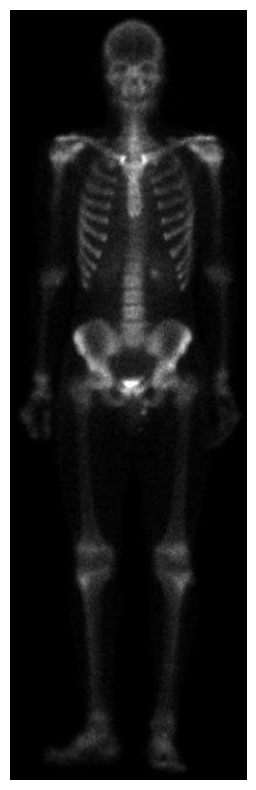

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Apply and display Laplacian of a) [1 Marks]


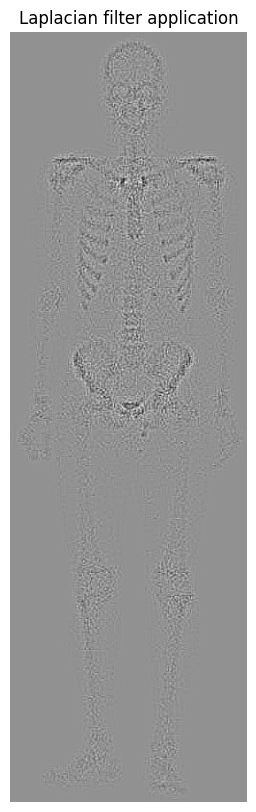

In [13]:
laplacianKernel=tf.constant([[1, 1, 1], 
                            [1, -8, 1],
                            [1, 1, 1]], dtype=tf.float32)

laplacianKernel=tf.reshape(laplacianKernel, [3, 3, 1, 1])

imgReshaped=tf.reshape(img_a, (1, img_a.shape[1], img_a.shape[2], 1))

laplacianImage=tf.nn.conv2d(imgReshaped, laplacianKernel, strides=[1, 1, 1, 1], padding='SAME')
laplacianImage=tf.squeeze(laplacianImage)

laplacianImage=(laplacianImage-tf.reduce_min(laplacianImage))/(tf.reduce_max(laplacianImage)-tf.reduce_min(laplacianImage))

plt.figure(figsize=(10, 10))
plt.imshow(laplacianImage, cmap='gray')
plt.axis('off')
plt.title("Laplacian filter application")
plt.show()

## c) Sharpen the image obtained by adding a) and b) [1 Marks]

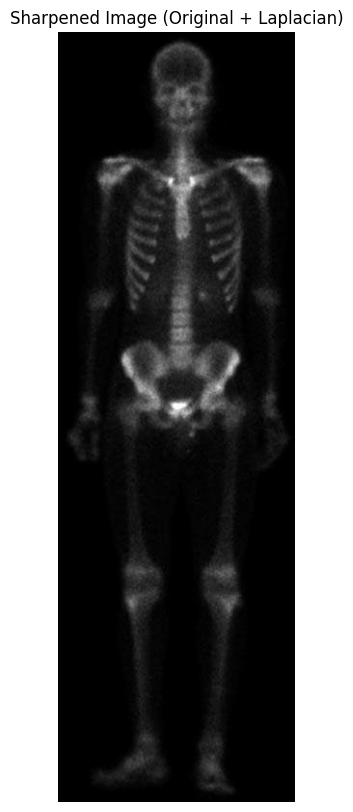

In [18]:
laplacian_img_reshaped = tf.reshape(laplacianImage, (1, laplacianImage.shape[0], laplacianImage.shape[1], 1))

alpha=1.0 #vary as needed

sharpened_img=img_a-alpha*laplacian_img_reshaped

sharpened_img=(sharpened_img-tf.reduce_min(sharpened_img))/(tf.reduce_max(sharpened_img)-tf.reduce_min(sharpened_img))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sharpened_img), cmap='gray')
plt.axis('off')
plt.title("Sharpened Image (Original + Laplacian)")
plt.show()

## d) Sobel gradient of a) [2 Marks]




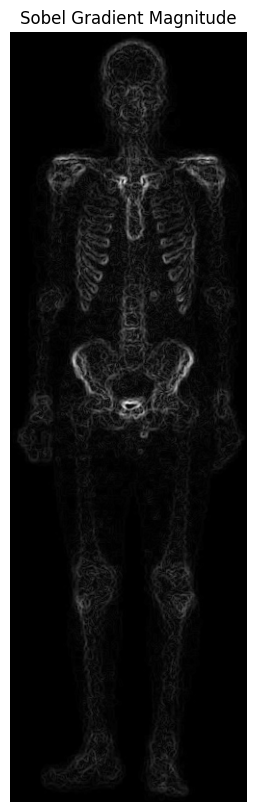

In [19]:
# Define Sobel Kernels (3x3)
sobel_x = tf.constant([[-1,  0,  1],
                        [-2,  0,  2],
                        [-1,  0,  1]], dtype=tf.float32)

sobel_y = tf.constant([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=tf.float32)

# Reshape kernels to match TensorFlow's conv2d format: [filter_height, filter_width, input_channels, output_channels]
sobel_x = tf.reshape(sobel_x, [3, 3, 1, 1])
sobel_y = tf.reshape(sobel_y, [3, 3, 1, 1])

# Apply Sobel kernels to the image
grad_x = tf.nn.conv2d(img_a, sobel_x, strides=[1, 1, 1, 1], padding='SAME')
grad_y = tf.nn.conv2d(img_a, sobel_y, strides=[1, 1, 1, 1], padding='SAME')

# Compute gradient magnitude
sobel_gradient = tf.sqrt(tf.square(grad_x) + tf.square(grad_y))

# Normalize for visualization
sobel_gradient = (sobel_gradient - tf.reduce_min(sobel_gradient)) / \
                 (tf.reduce_max(sobel_gradient) - tf.reduce_min(sobel_gradient))

# Display Sobel gradient image
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_gradient), cmap='gray')
plt.axis('off')
plt.title("Sobel Gradient Magnitude")
plt.show()


## e) Smooth the d) with a $5\times 5$ averaging filter [2 Marks]

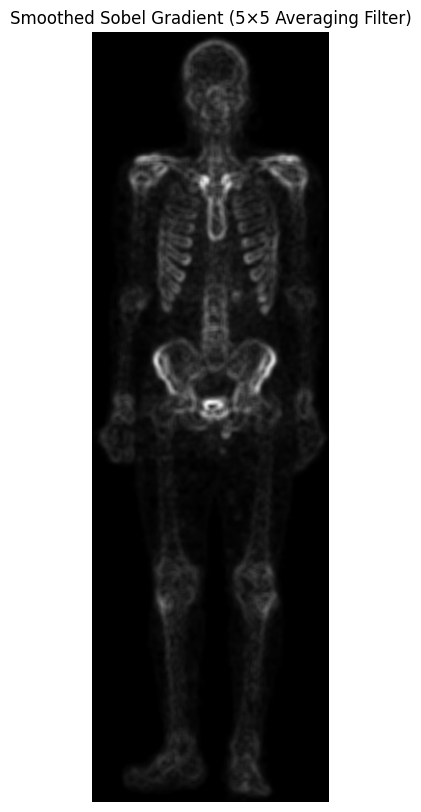

In [20]:
# Define 5x5 Averaging Kernel
avg_kernel = tf.ones((5, 5), dtype=tf.float32) / 25.0  # Each element = 1/25

# Reshape kernel to match TensorFlow's conv2d format: [height, width, in_channels, out_channels]
avg_kernel = tf.reshape(avg_kernel, [5, 5, 1, 1])

# Apply convolution to smooth the Sobel gradient
smoothed_img = tf.nn.conv2d(sobel_gradient, avg_kernel, strides=[1, 1, 1, 1], padding='SAME')

# Normalize for visualization
smoothed_img = (smoothed_img - tf.reduce_min(smoothed_img)) / \
               (tf.reduce_max(smoothed_img) - tf.reduce_min(smoothed_img))

# Display smoothed image
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(smoothed_img), cmap='gray')
plt.axis('off')
plt.title("Smoothed Sobel Gradient (5×5 Averaging Filter)")
plt.show()


## f) Get Mask image formed by pixelwise product of c) and e) [1 Marks]

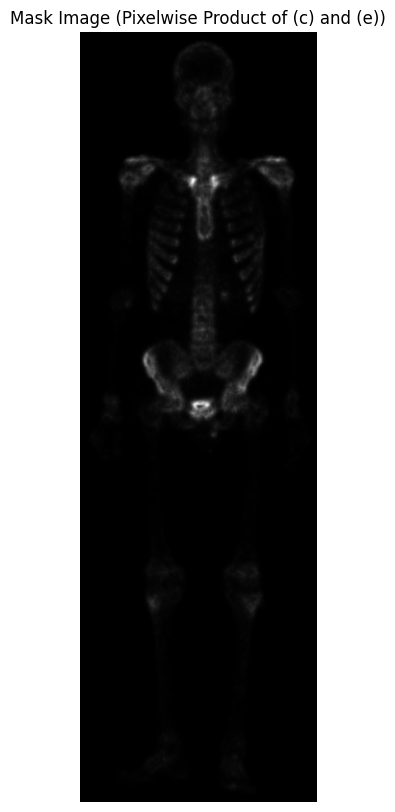

In [21]:
# Perform pixelwise product of sharpened image and smoothed Sobel gradient
mask_img = sharpened_img * smoothed_img

# Normalize for visualization
mask_img = (mask_img - tf.reduce_min(mask_img)) / \
           (tf.reduce_max(mask_img) - tf.reduce_min(mask_img))

# Display the mask image
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(mask_img), cmap='gray')
plt.axis('off')
plt.title("Mask Image (Pixelwise Product of (c) and (e))")
plt.show()


## g) Get sharpened image obtained by the sum of a) and f) [1 Marks]

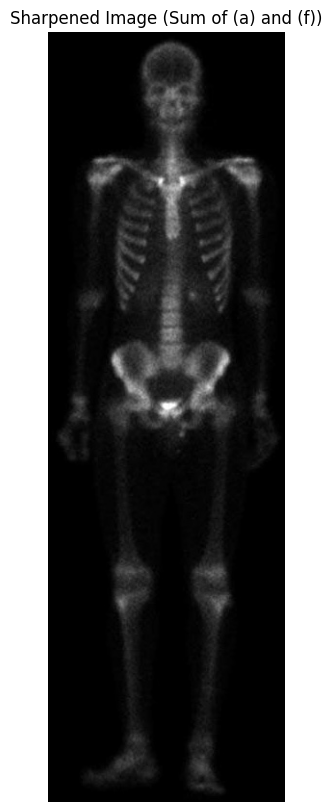

In [22]:
# Sum of original image (a) and mask image (f)
sharpened_image_sum = img_a + mask_img

# Normalize for visualization
sharpened_image_sum = (sharpened_image_sum - tf.reduce_min(sharpened_image_sum)) / \
                      (tf.reduce_max(sharpened_image_sum) - tf.reduce_min(sharpened_image_sum))

# Display the sharpened image obtained by the sum of (a) and (f)
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sharpened_image_sum), cmap='gray')
plt.axis('off')
plt.title("Sharpened Image (Sum of (a) and (f))")
plt.show()


## h) Get bone enhancing by applying power law transformation to g) [1 Marks]


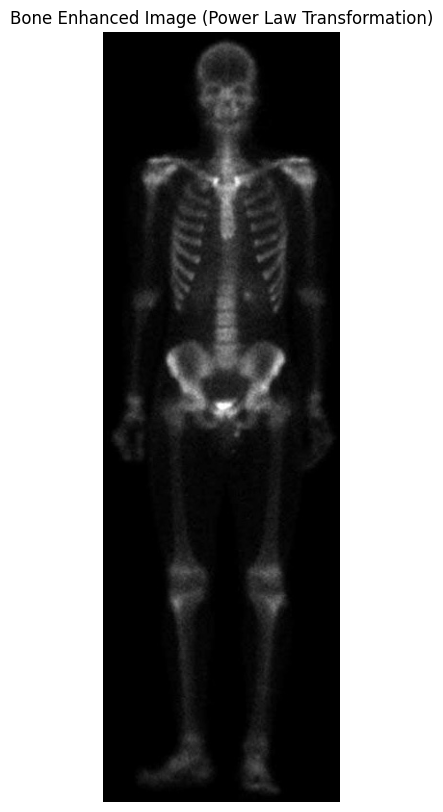

In [34]:
# Define gamma value for power law transformation (typically between 0.5 and 2.0)
gamma = 0.95  # You can experiment with this value

# Apply power law transformation (c = 1)
enhanced_img = tf.pow(sharpened_image_sum, gamma)

# Normalize for visualization
enhanced_img = (enhanced_img - tf.reduce_min(enhanced_img)) / \
               (tf.reduce_max(enhanced_img) - tf.reduce_min(enhanced_img))

# Display the enhanced image
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(enhanced_img), cmap='gray')
plt.axis('off')
plt.title("Bone Enhanced Image (Power Law Transformation)")
plt.show()


##i) Write down your observation related to image enhancement from a) to h) [1 Marks]

part a simply loads the image
part b, utilising the Laplacian filter a 2d filter for sharpening, gives us the edges highlighted
part c, adding back the Laplacian into the original image, emphasises the edges more, giving us a clearer outline of the bones of the ribs, hips, skull, etc
part d, the sobel kernel gives us an even clearer outline of the edges, using the gradient to get a precise edge image
part e, cancels out noise, keeping the important outlines clear
part f, combines the sharpened image and the gradient, clarifying the prominent structure.
part g, gives a further sharpened image by adding the mask back into the original image, with clear definition of the important outlines and edges
part h, applying gamma transformation, with a experimental value of 0.95. a lower value increases the noise, and a higher value, reduces clarity at edges